# Desafío 3

## Modelado para Mushrooms

---
<b><a id='section_1_'>1.1. Descripción del dataset Hongos</a></b>

In [449]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [450]:
data_location = "../Data/Hongos/mushrooms.csv"
data = pd.read_csv(data_location, sep=",")
print(data.shape)


(8124, 23)


In [451]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example


data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
class,object,0.0,0,2,"[p, e]"
cap-shape,object,0.0,0,6,"[x, b, s, f, k, c]"
cap-surface,object,0.0,0,4,"[s, y, f, g]"
cap-color,object,0.0,0,10,"[n, y, w, g, e, p, b, u, c, r]"
bruises,object,0.0,0,2,"[t, f]"
odor,object,0.0,0,9,"[p, a, l, n, f, c, y, s, m]"
gill-attachment,object,0.0,0,2,"[f, a]"
gill-spacing,object,0.0,0,2,"[c, w]"
gill-size,object,0.0,0,2,"[n, b]"
gill-color,object,0.0,0,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [452]:
# Analizamos la proporción entre clases Target
data['class'].value_counts(normalize=True).round(2)

e    0.52
p    0.48
Name: class, dtype: float64

---
<b><a id='section_1_'>1.2. Transformación de variables Categoricas</a></b>

In [453]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

### Probando LabelEncoder

In [454]:
le = LabelEncoder()

In [455]:
data_encoded = data.apply(le.fit_transform)
data_encoded.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

### Separación de features, target y sets de entrenamiento y testeo

In [483]:
erase_columns = ['cap-color','veil-type', 'stalk-shape', 'gill-size', 'gill-attachment', 'gill-spacing', 'bruises','class', 'veil-color', 'ring-number', 'stalk-surface-above-ring', 'population', 'stalk-color-above-ring','stalk-root', 'odor','stalk-surface-below-ring', 'stalk-color-below-ring','cap-shape', 'cap-surface']
X = data_encoded[['ring-type']]
y = data_encoded['class']
print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


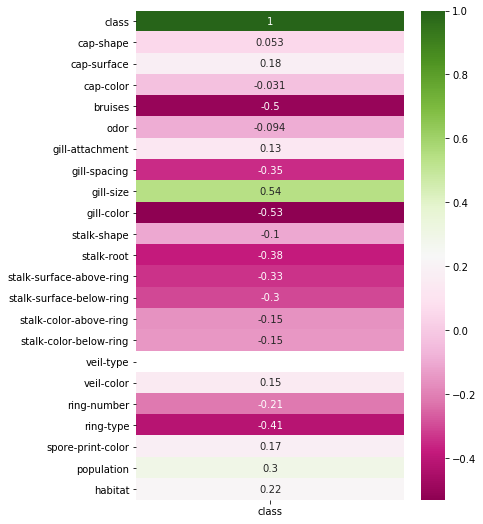

In [457]:
plt.figure(figsize=(6,9))
sns.heatmap(data_encoded.corr()[['class']], cmap="PiYG", annot=True)

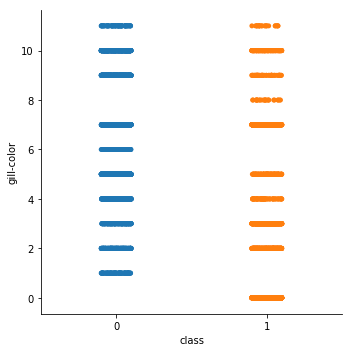

In [458]:
sns.catplot(x='class', y='gill-color', data=data_encoded)
#sns.pairplot(data_encoded.drop('veil-type', axis=1), hue='class')

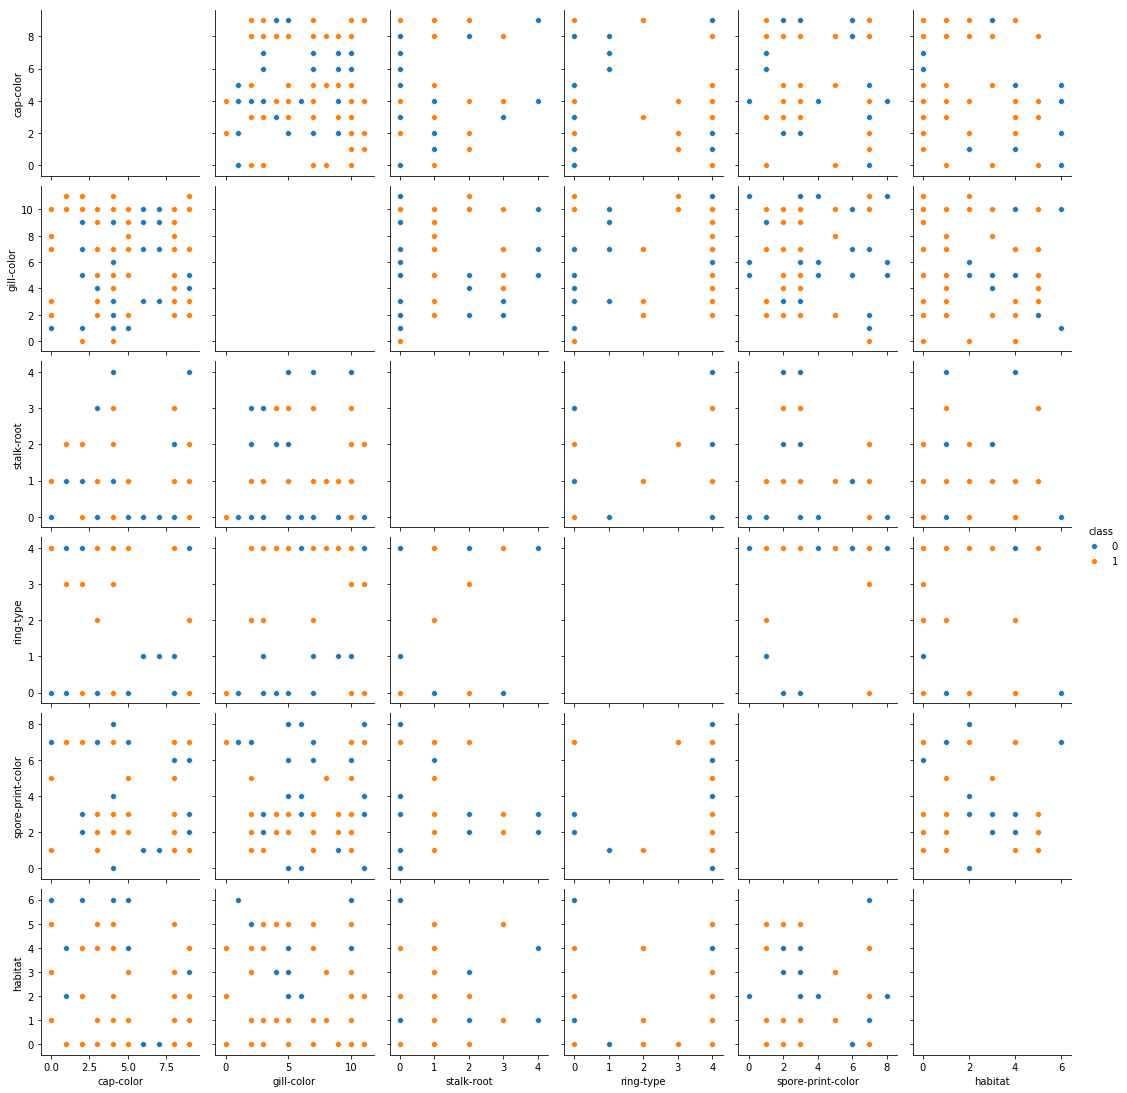

In [459]:
erase_columns2 = ['veil-type', 'stalk-shape', 'gill-size', 'gill-attachment', 'gill-spacing', 'bruises', 'veil-color', 'ring-number', 'stalk-surface-above-ring', 'stalk-surface-below-ring','population', 'stalk-color-above-ring', 'odor', 'stalk-color-below-ring', 'cap-shape', 'cap-surface']
sns.pairplot(data_encoded.drop(erase_columns2, axis=1), diag_kind='none', hue='class')

In [460]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [461]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [462]:
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

0    0.52
1    0.48
Name: class, dtype: float64

0    0.52
1    0.48
Name: class, dtype: float64

### GridSearchCV con KNN y LogisticRegression

In [463]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

In [464]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [465]:
k_range = list(range(1, 30))
C = [0.02,0.03,0.04,0.05,0.06]
solver = ['saga']
penalty = ['l1','l2']
weight_options = ['uniform', 'distance']
#class_weight = ['balanced']


In [466]:
param_grid_lr = dict(C=C, solver=solver, penalty=penalty)
print(param_grid_lr)

{'C': [0.02, 0.03, 0.04, 0.05, 0.06], 'solver': ['saga'], 'penalty': ['l1', 'l2']}


In [467]:
param_grid_knn = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


Evaluamos la mejor configuración de hiperparámetros de cada modelo: **LogReg** y **KNN**

In [468]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [469]:
grid_lr = GridSearchCV(lr, param_grid_lr, cv=folds, scoring='accuracy')
grid_lr.fit(X_train, y_train)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=folds, scoring='accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [470]:
print("Logistic Regression:")
print(grid_lr.best_estimator_)
print(grid_lr.best_score_)
print(grid_lr.best_params_)
print("######################")
print("KNN:")
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

Logistic Regression:
LogisticRegression(C=0.02, penalty='l1', solver='saga')
0.667967912999004
{'C': 0.02, 'penalty': 'l1', 'solver': 'saga'}
######################
KNN:
KNeighborsClassifier(n_neighbors=17)
0.8663972112304503
{'n_neighbors': 17, 'weights': 'uniform'}


In [471]:
y_pred_grid_lr = grid_lr.predict(X_test)
y_pred_grid_knn = grid_knn.predict(X_test)

In [472]:
print (classification_report(y_test, y_pred_grid_lr))
print (classification_report(y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72      1052
           1       0.73      0.48      0.58       979

    accuracy                           0.66      2031
   macro avg       0.68      0.66      0.65      2031
weighted avg       0.68      0.66      0.65      2031

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1052
           1       0.85      0.89      0.87       979

    accuracy                           0.87      2031
   macro avg       0.87      0.87      0.87      2031
weighted avg       0.87      0.87      0.87      2031



[[878 174]
 [507 472]]
[[898 154]
 [104 875]]


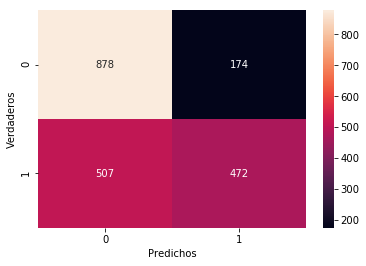

In [473]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
confusion_lr = confusion_matrix(y_test, y_pred_grid_lr)
print(confusion_lr)
confusion_knn = confusion_matrix(y_test, y_pred_grid_knn)
print(confusion_knn)
sns.heatmap(confusion_lr, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

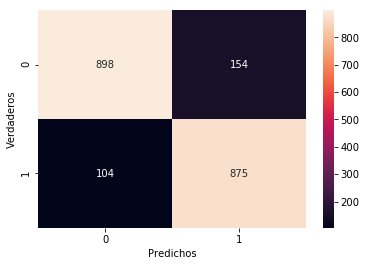

In [474]:
sns.heatmap(confusion_knn, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [475]:
y_pred_lr_proba = grid_lr.predict_proba(X_test)
y_pred_lr_proba_df = pd.DataFrame(y_pred_lr_proba)
y_pred_lr_proba_df

,0,1
0,0.608978,0.391022
1,0.608978,0.391022
2,0.397469,0.602531
3,0.397469,0.602531
4,0.397469,0.602531
...,...,...
2026,0.608978,0.391022
2027,0.539088,0.460912
2028,0.539088,0.460912
2029,0.539088,0.460912


### Test sobre los threshold

In [476]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = y_pred_lr_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1), Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.48202855736090594
[[   0 1052]
 [   0  979]]

******** For i = 0.1 ******
Our testing accuracy is 0.48202855736090594
[[   0 1052]
 [   0  979]]

******** For i = 0.15 ******
Our testing accuracy is 0.48202855736090594
[[   0 1052]
 [   0  979]]

******** For i = 0.2 ******
Our testing accuracy is 0.48202855736090594
[[   0 1052]
 [   0  979]]

******** For i = 0.25 ******
Our testing accuracy is 0.48202855736090594
[[   0 1052]
 [   0  979]]

******** For i = 0.3 ******
Our testing accuracy is 0.48202855736090594
[[   0 1052]
 [   0  979]]

******** For i = 0.35 ******
Our testing accuracy is 0.48202855736090594
[[   0 1052]
 [   0  979]]

******** For i = 0.4 ******
Our testing accuracy is 0.29246676514032494
[[  18 1034]
 [ 403  576]]

******** For i = 0.45 ******
Our testing accuracy is 0.4707040866568193
[[431 621]
 [454 525]]

******** For i = 0.5 ******
Our testing accuracy is 0.6646971935007385
[[878 174]
 [507 472]]

****

In [477]:
# Specificity
TP = confusion_lr[1, 1]
TN = confusion_lr[0, 0]
FP = confusion_lr[0, 1]
FN = confusion_lr[1, 0]

speci = TN/(TN+FP)
speci

0.8346007604562737

### Curva ROC

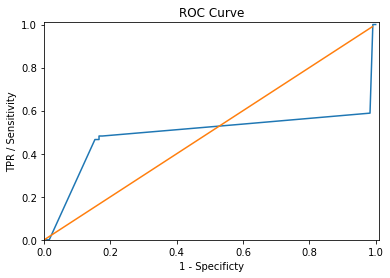

In [478]:
from sklearn.metrics import roc_curve
fpr_lr,tpr_lr,thr_lr = roc_curve(y_test, y_pred_lr_proba[:,1])

df = pd.DataFrame(dict(fpr=fpr_lr, tpr=tpr_lr, thr = thr_lr))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [479]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_lr, tpr_lr))

AUC= 0.4900350322553082


(0, 1)

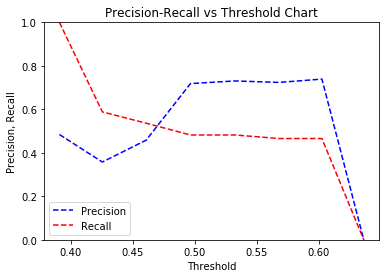

In [480]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr_proba[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [481]:
best_lr=grid_lr.best_estimator_
best_lr

LogisticRegression(C=0.02, penalty='l1', solver='saga')

In [482]:
coeficientes = pd.DataFrame(best_lr.coef_, columns=X.columns).T
coeficientes.sort_values(by=0)

,0
spore-print-color,0.143173
